# Evaluating the Models

Using the evaluation.csv file created in `./head2head_eval.py` we will evaluate the models and compare their performance. This will be done in the following stages:

1. Exploratory analysis of the evaluation results.
2. Verifying the results by manually inspecting the predictions.
3. Comparison of the models specifically using their evaluation metrics.
4. Visualizing the predictions to understand the models' performance.
5. Conclusion and final thoughts.

In [4]:
import pandas as pd

df = pd.read_csv('data/dev/test_evaluation.csv', na_filter=False)
df.head(2)

,question,answer,player_a,player_b,whois_player_a,whois_player_b,prompt,best_response
0,What courses will I take in my first year as a...,"In your first year, you'll embark on an exciti...","Welcome to SUNY Brockport! In your first year,...",In your first year as a Physics Adolescence In...,Finetuned,RAG,Question: What courses will I take in my first...,None
1,What are the rules for cannabis use on SUNY Br...,"At SUNY Brockport, the use or possession of ca...",We value your creativity! We offer a variety o...,"I'm sorry, I don't know.",Scratch,RAG,Question: What are the rules for cannabis use ...,None


In [5]:
df['best_response'].value_counts()

best_response
None    1521
A       1334
B       1180
Name: count, dtype: int64

In [6]:
df_best = df[df['best_response'].isin(['A', 'B'])].reset_index(drop=True)
print(df_best.loc[0, 'prompt'])

# Pretty clearly in favor of B

Question: What kind of support can I expect from the Hazen Center for Integrated Care if I'm dealing with a stressful situation?
Ground Truth: At the Hazen Center for Integrated Care, you'll find a supportive and confidential environment where counselors and health care professionals are ready to listen and help. They offer a range of services to assist you through stressful times, and any information you share will be kept confidential, with the exception of situations involving harm to self or others. Don't hesitate to reach out at (585) 395-2414 for the support you need.
Player A: Our hazen center for integrated care is dedicated to supporting students with disabilities. They offer a range of support services, including [UNK] assistance with [UNK], [UNK] [UNK], [UNK] [UNK], and [UNK] [UNK] [UNK], [UNK] [UNK] [UNK], and [UNK] [UNK] [UNK]. Our dedicated staff will work with you to ensure your wellbeing is secure and effective care.
Player B: At the Hazen Center for Integrated Care, we

In [7]:
idx=1
print(df_best.loc[idx, 'prompt'])
print("\nGPT-4 picked Player", df_best.loc[idx, 'best_response'])

# Slightly in favor of A, just on enthuasiasm. But its less significant than the first example.

Question: Are there any prerequisites or requirements to participate in the Nursing study abroad program?
Ground Truth: To ensure the best possible experience, there may be certain prerequisites or requirements for the Nursing study abroad program. These could include academic standing, language proficiency, or specific coursework completion. We recommend reaching out to the Nursing department for the most up-to-date information on eligibility.
Player A: Yes, to be eligible for the nursing program, you must be a junior with a senior major with a minimum of c or higher in nursing major courses. This is a fantastic opportunity to gain a global perspective and experience in a nursing field!
Player B: To participate in the Nursing study abroad program, you need to have completed the prerequisites with a minimum grade of C and meet the criteria listed for prospective nursing students.

GPT-4 picked Player A


In [8]:
idx=2
print(df_best.loc[idx, 'prompt'])
print("\nGPT-4 picked Player", df_best.loc[idx, 'best_response'])

# I prefer A, player B telling me to carry a flashlight or headlamp everywhere is a bit much lol.

Question: What essential items should I bring to every class to ensure I'm prepared for an emergency?
Ground Truth: Being prepared is key! Always carry your class roster, a cell phone, and a list of important telephone numbers, such as department leadership or lab managers. These items will help you manage any situation more effectively.
Player A: You should bring a copy of the basic emergency procedures, a list of emergency contacts, and any necessary medical information to ensure you are prepared for an emergency in every class. It's always better to be prepared!
Player B: To prepare for an emergency, it's important to have essential items with you at all times. This includes a water bottle, a first aid kit, a flashlight or headlamp, a whistle, a personal ID card or other identification, a cell phone charger, and an extra battery or power bank. Remember, always carry these items with you in case of an unexpected situation!

GPT-4 picked Player A


In [9]:
idx=3
print(df_best.loc[idx, 'prompt'])
print("\nGPT-4 picked Player", df_best.loc[idx, 'best_response'])

# Player A nearly aced it, I suspect this is the scratch model because it repeated itself many times...

Question: How can I learn more about SUNY Brockport's community justice program or schedule a visit?
Ground Truth: We'd love to share more about our exciting community justice program with you! To get personalized information about this area of interest, simply request more info on our website. And if you're ready to experience SUNY Brockport firsthand, we offer tours throughout the year. February and March are particularly busy, so be sure to schedule your visit soon. We can't wait to welcome you to our campus and show you all that our program has to offer!
Player A: Wed love to share more about our community with you! You can request personalized information about your area of interest by visiting our website and filling out a request form. We offer tours throughout the year, with february and march being particularly popular. Schedule a visit to our campus firsthand, with february and march being particularly popular. We offer tours throughout the year, with february and march being

In [10]:
idx=4
print(df_best.loc[idx, 'prompt'])
print("\nGPT-4 picked Player", df_best.loc[idx, 'best_response'])

# Player A nearly aced it, I suspect this is the scratch model because it repeated itself many times...

Question: What should I do if I want to serve alcohol at my event?
Ground Truth: For events involving alcohol, please contact the Events Coordinator directly. We have specific guidelines to ensure your event is both enjoyable and compliant with our policies.
Player A: If you plan on serving alcoholic beverages at your event, you must have an Alcohol Service Permit (ASP). You can apply for this permit through the Office of Campus Activities by the Monday before the event. Make sure to follow all guidelines and rules related to alcohol service to ensure a smooth and compliant experience.
Player B: If you suspect that [UNK] is [UNK], its important to [UNK] the [UNK] to avoid [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK]. [UNK] [UNK] [UNK] [UNK], [UNK] [UNK] [UNK], or [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [

# Look for GPT-4 bias

Specifically I am interested if GPT-4 had bias regarding the order of the players. I have seen in other papers doing similar strategies that GPT-4 prefers the first response (QLoRA paper specifically highlighted this), is this the case here?

In [11]:
a_responses = df[df['best_response'] == 'A']
a_responses['whois_player_a'].value_counts()

whois_player_a
RAG          648
Finetuned    636
Scratch       50
Name: count, dtype: int64

In [12]:
a_responses['whois_player_b'].value_counts()

whois_player_b
Scratch      870
RAG          247
Finetuned    217
Name: count, dtype: int64

In [13]:
b_responses = df[df['best_response'] == 'B']
b_responses['whois_player_b'].value_counts()

whois_player_b
RAG          609
Finetuned    515
Scratch       56
Name: count, dtype: int64

In [14]:
b_responses['whois_player_a'].value_counts()

whois_player_a
Scratch      747
Finetuned    218
RAG          215
Name: count, dtype: int64

It is pretty clear the scratch model is typically losing.

In [15]:
none_responses = df[df['best_response'] == 'None']
# print((none_responses['whois_player_a'] + " vs " + none_responses['whois_player_b']).value_counts())

# Combined them from above to see total counts of "None" responses
print(f"Scratch vs Finetuned    {337+213}")
print(f"RAG vs Scratch          {227+190}")
print(f"RAG vs Finetuned        {292+213}")

Scratch vs Finetuned    550
RAG vs Scratch          417
RAG vs Finetuned        505


In [16]:
df[df['best_response'] != "None"][['whois_player_a', 'whois_player_b', 'best_response']].reset_index(drop=True).to_csv('tmp.csv', index=False)

In [17]:
df

,question,answer,player_a,player_b,whois_player_a,whois_player_b,prompt,best_response
0,What courses will I take in my first year as a...,"In your first year, you'll embark on an exciti...","Welcome to SUNY Brockport! In your first year,...",In your first year as a Physics Adolescence In...,Finetuned,RAG,Question: What courses will I take in my first...,None
1,What are the rules for cannabis use on SUNY Br...,"At SUNY Brockport, the use or possession of ca...",We value your creativity! We offer a variety o...,"I'm sorry, I don't know.",Scratch,RAG,Question: What are the rules for cannabis use ...,None
2,What kind of support can I expect from the Haz...,"At the Hazen Center for Integrated Care, you'l...",Our hazen center for integrated care is dedica...,"At the Hazen Center for Integrated Care, we un...",Scratch,Finetuned,Question: What kind of support can I expect fr...,B
3,Are there any prerequisites or requirements to...,"To ensure the best possible experience, there ...","Yes, to be eligible for the nursing program, y...",To participate in the Nursing study abroad pro...,Scratch,RAG,Question: Are there any prerequisites or requi...,A
4,What essential items should I bring to every c...,Being prepared is key! Always carry your class...,You should bring a copy of the basic emergency...,"To prepare for an emergency, it's important to...",RAG,Finetuned,Question: What essential items should I bring ...,A
...,...,...,...,...,...,...,...,...
4030,What services does SUNY Brockport offer to hel...,"At SUNY Brockport, we're dedicated to ensuring...",SUNY Brockport offers various services to help...,SUNY Brockport is committed to supporting stud...,RAG,Scratch,Question: What services does SUNY Brockport of...,A
4031,How do I apply for the SUNY Washington Program...,You can apply for the SUNY Washington Program ...,Applying for the SUNY washington program is st...,Applications for the SUNY Washington Program c...,Scratch,Finetuned,Question: How do I apply for the SUNY Washingt...,B
4032,How can I register my student organization wit...,That's a great step towards making your mark o...,You can register your student organization wit...,You can register with your student organizatio...,RAG,Scratch,Question: How can I register my student organi...,B
4033,How can I find out about upcoming events at SU...,You can discover all the exciting events happe...,You can find out about upcoming events at SUNY...,Staying informed is key! You can find all the ...,RAG,Scratch,Question: How can I find out about upcoming ev...,B


In [18]:
# Calculate win rates in head-to-head matchups
df = df[df['best_response'] != "None"].reset_index(drop=True)
# Function to calculate win rate
def calculate_win_rate(df, player):
    total_matches = df[(df['whois_player_a'] == player) | (df['whois_player_b'] == player)]
    wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) | 
                         ((df['whois_player_b'] == player) & (df['best_response'] == 'B'))]
    if len(total_matches) == 0:
        return 0
    win_rate = len(wins) / len(total_matches)
    return win_rate

# Identify unique models
models = pd.unique(df[['whois_player_a', 'whois_player_b']].values.ravel('K'))

# Calculate win rates for each model
win_rates = {model: calculate_win_rate(df, model) for model in models}

# Convert win rates to DataFrame for visualization
win_rates_df = pd.DataFrame(list(win_rates.items()), columns=['Model', 'Win Rate'])

win_rates_df


/tmp/ipykernel_72260/619075114.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) |
/tmp/ipykernel_72260/619075114.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) |
/tmp/ipykernel_72260/619075114.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) |


,Model,Win Rate
0,Scratch,0.061521
1,RAG,0.731239
2,Finetuned,0.725725


In [19]:
df.to_csv("tmp.csv", index=False)

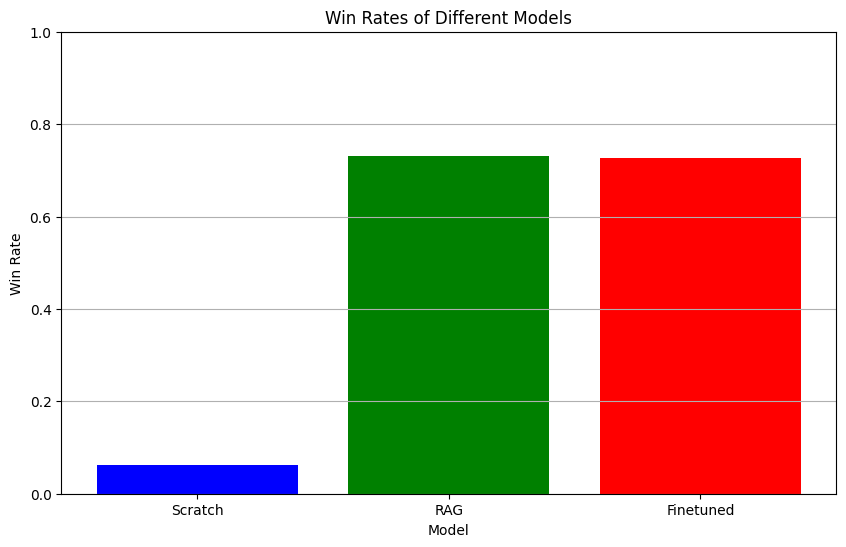

In [20]:
import matplotlib.pyplot as plt

# Plotting the win rates
plt.figure(figsize=(10, 6))
plt.bar(win_rates_df['Model'], win_rates_df['Win Rate'], color=['blue', 'green', 'red'])
plt.title('Win Rates of Different Models')
plt.xlabel('Model')
plt.ylabel('Win Rate')
plt.ylim(0, 1)  # Win rates range from 0 to 1
plt.grid(axis='y')

# Display the plot
plt.show()


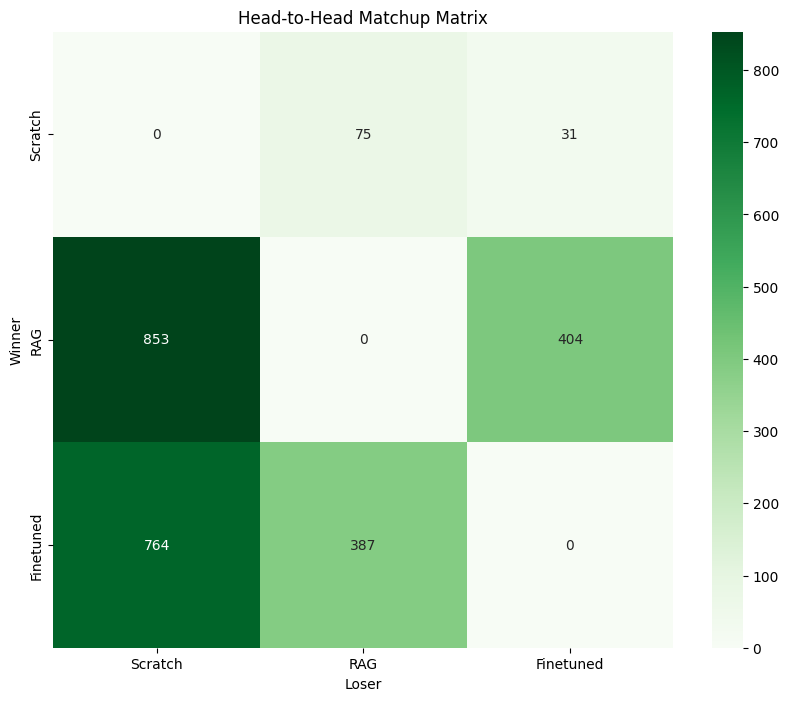

In [21]:
import seaborn as sns

# Creating a confusion matrix for the matchups
# Initialize a matrix with zeros
matchup_matrix = pd.DataFrame(0, index=models, columns=models)

# Populate the matrix with win counts
for i, row in df.iterrows():
    winner = row['whois_player_a'] if row['best_response'] == 'A' else row['whois_player_b']
    loser = row['whois_player_b'] if row['best_response'] == 'A' else row['whois_player_a']
    matchup_matrix.loc[winner, loser] += 1

# Creating a heatmap from the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(matchup_matrix, annot=True, cmap="Greens", fmt='g')
plt.title('Head-to-Head Matchup Matrix')
plt.xlabel('Loser')
plt.ylabel('Winner')
plt.show()


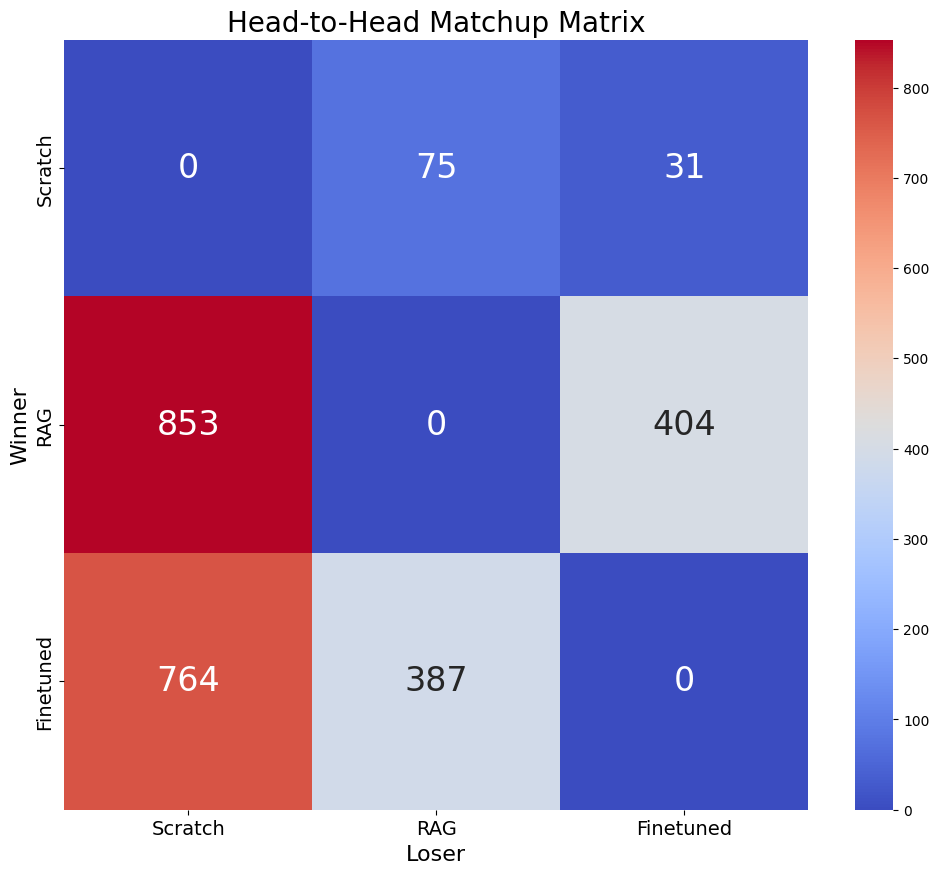

In [22]:
# Reattempting to create the heatmap with adjusted text sizes for better readability
plt.figure(figsize=(12, 10))
sns.heatmap(matchup_matrix, annot=True, cmap="coolwarm", fmt='g', annot_kws={'size': 24})
plt.title('Head-to-Head Matchup Matrix', fontsize=20)
plt.xlabel('Loser', fontsize=16)
plt.ylabel('Winner', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('./head_to_head_heatmap_transparent.png', bbox_inches='tight', transparent=True)

plt.show()


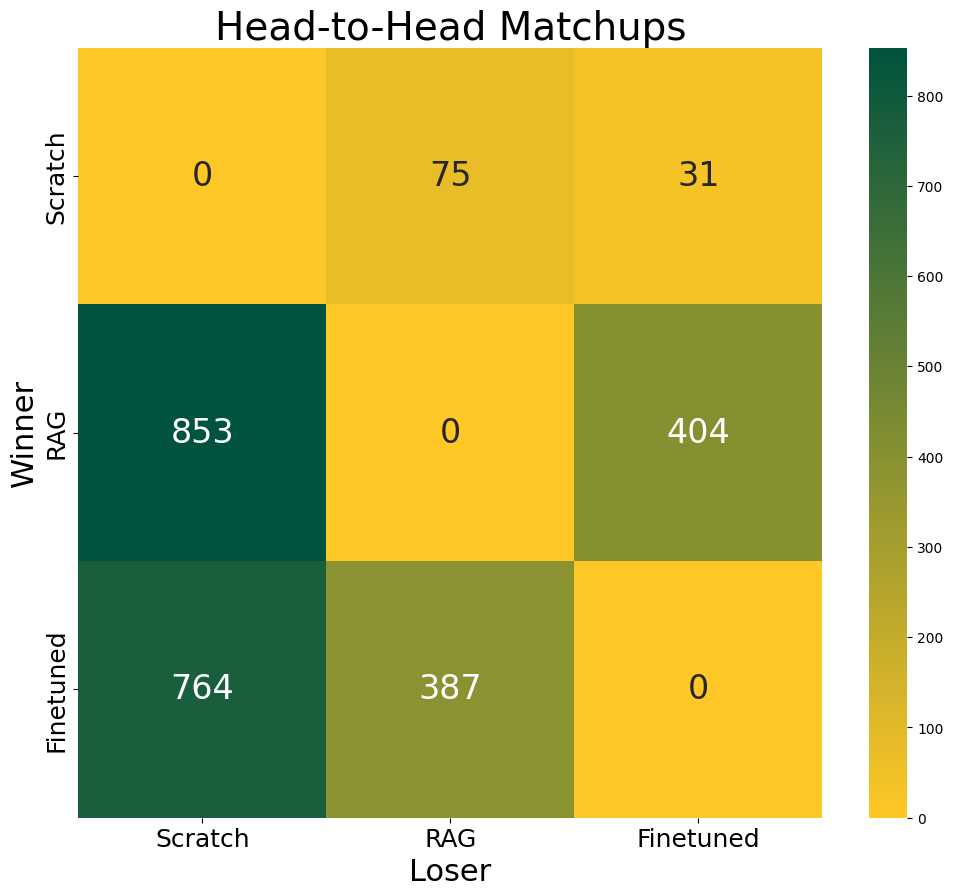

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Define the hex colors for green and yellow
start_color = '#FFC726'  # Yellow
end_color = '#00533E'    # Green

# Create a colormap from green to yellow
green_yellow_cmap = LinearSegmentedColormap.from_list("yellow_green", [start_color, end_color])

# Assuming 'matchup_matrix' is your DataFrame for the heatmap

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(matchup_matrix, annot=True, cmap=green_yellow_cmap, fmt='g', annot_kws={'size': 24})
plt.title('Head-to-Head Matchups', fontsize=28)
plt.xlabel('Loser', fontsize=22)
plt.ylabel('Winner', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Optionally, save the figure with a transparent background
plt.savefig('./head_to_head_heatmap_custom_transparent.png', bbox_inches='tight', transparent=True)

# Display the plot
plt.show()


/tmp/ipykernel_19751/2626761721.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) |
/tmp/ipykernel_19751/2626761721.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) |
/tmp/ipykernel_19751/2626761721.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) |


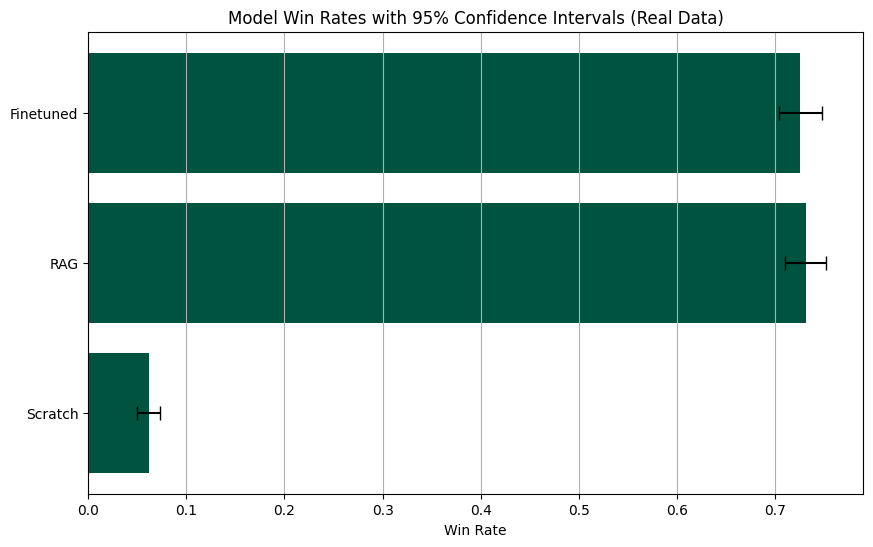

(None,
 [0.061520603598374926, 0.731239092495637, 0.7257250945775536],
 [0.05017477815101151, 0.7102820071051507, 0.7037675594009842],
 [0.07286642904573834, 0.7521961778861234, 0.747682629754123],
 [1723, 1719, 1586])

In [ ]:
z = 1.96  # 95% confidence interval

import seaborn as sns

# Filter out rows where best_response is "None"
df_filtered = df[df['best_response'] != "None"].reset_index(drop=True)

# Modified function to also return total matches
def calculate_win_rate_and_total_matches(df, player):
    total_matches = df[(df['whois_player_a'] == player) | (df['whois_player_b'] == player)]
    wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) | 
                         ((df['whois_player_b'] == player) & (df['best_response'] == 'B'))]
    if len(total_matches) == 0:
        return 0, 0
    win_rate = len(wins) / len(total_matches)
    return win_rate, len(total_matches)

# Calculate win rates and total matches for each model
models = pd.unique(df_filtered[['whois_player_a', 'whois_player_b']].values.ravel('K'))
win_rates_real = {model: calculate_win_rate_and_total_matches(df_filtered, model) for model in models}

# Calculate 95% confidence intervals using the real total matches
ci_real = {}
for model, (win_rate, total_matches) in win_rates_real.items():
    margin_error = z * np.sqrt((win_rate * (1 - win_rate)) / total_matches)
    ci_real[model] = (win_rate - margin_error, win_rate + margin_error)

# Prepare the data for real plotting
models_real = list(win_rates_real.keys())
win_rates_real_values = [win_rates_real[model][0] for model in models_real]
total_matches_real_values = [win_rates_real[model][1] for model in models_real]
lower_bounds_real = [ci_real[model][0] for model in models_real]
upper_bounds_real = [ci_real[model][1] for model in models_real]

# Plot with real values
plt.figure(figsize=(10, 6))
y_pos_real = np.arange(len(models_real))
plt.barh(y_pos_real, win_rates_real_values, color='#00533E', xerr=[win_rates_real_values - np.array(lower_bounds_real), np.array(upper_bounds_real) - win_rates_real_values], capsize=5)
plt.yticks(y_pos_real, models_real)
plt.xlabel('Win Rate')
plt.title('Model Win Rates with 95% Confidence Intervals (Real Data)')
plt.grid(axis='x')

plt.show(), win_rates_real_values, lower_bounds_real, upper_bounds_real, total_matches_real_values


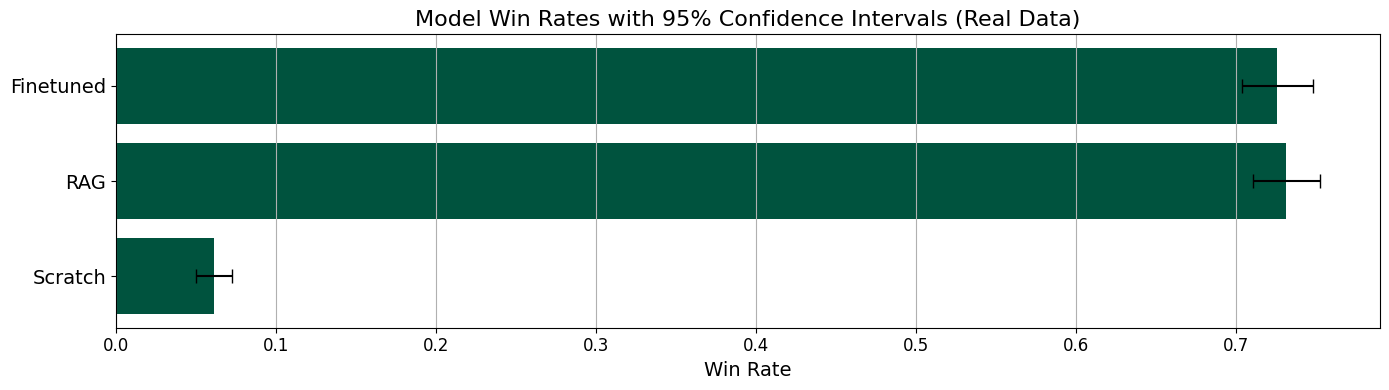

In [ ]:
# Adjusting the plot to be wider and increasing the text size for poster application
plt.figure(figsize=(14, 4))  # Making the plot wider
y_pos_wide = np.arange(len(models_real))
plt.barh(y_pos_wide, win_rates_real_values, color='#00533E', xerr=[win_rates_real_values - np.array(lower_bounds_real), np.array(upper_bounds_real) - win_rates_real_values], capsize=5)
plt.yticks(y_pos_wide, models_real, fontsize=14)  # Increasing font size for model names
plt.xlabel('Win Rate', fontsize=14)  # Increasing font size for the x-axis label
plt.title('Model Win Rates with 95% Confidence Intervals (Real Data)', fontsize=16)  # Increasing the title font size
plt.xticks(fontsize=12)  # Increasing font size for x-axis ticks
plt.grid(axis='x')

plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


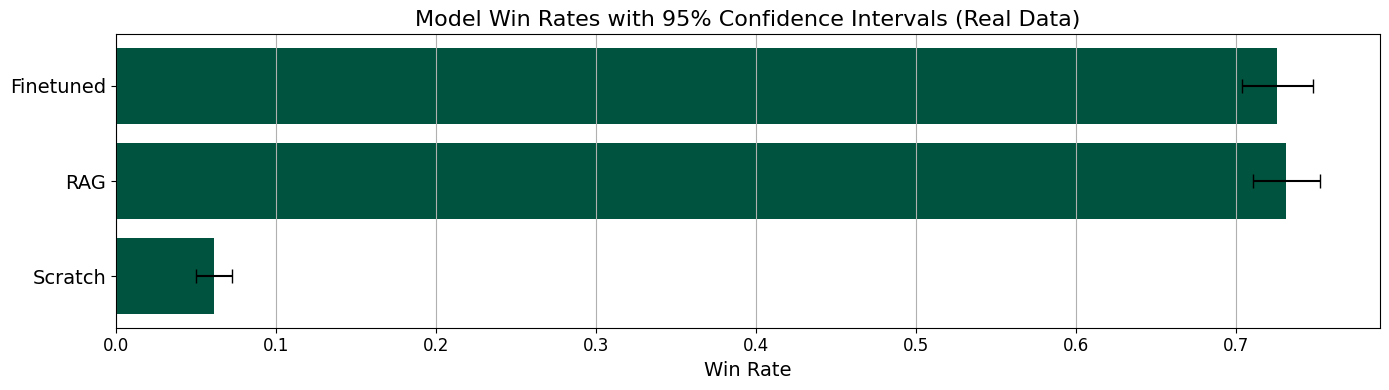

In [ ]:
# Attempting the plot adjustment again with specified requirements
plt.figure(figsize=(14, 4))  # Adjusting figure size for a wider plot
ax = plt.gca()  # Get the current Axes instance before plotting to adjust background
ax.set_facecolor('white')  # Set the inside background to white for contrast
ax.figure.set_facecolor('none')  # Set the overall figure background to transparent
ax.figure.set_alpha(0)  # Ensure the background is fully transparent

# Creating the bar plot
plt.barh(y_pos_wide, win_rates_real_values, color='#00533E', xerr=[win_rates_real_values - np.array(lower_bounds_real), np.array(upper_bounds_real) - win_rates_real_values], capsize=5)
plt.yticks(y_pos_wide, models_real, fontsize=14)  # Increasing font size for model names
plt.xlabel('Win Rate', fontsize=14)  # Increasing font size for the x-axis label
plt.title('Model Win Rates with 95% Confidence Intervals (Real Data)', fontsize=16)  # Increasing the title font size
plt.xticks(fontsize=12)  # Increasing font size for x-axis ticks
plt.grid(axis='x')

plt.tight_layout()  # Adjust layout to not cut off labels
plt.savefig('./adjusted_bar_graph_transparent.png', transparent=True, bbox_inches='tight')  # Save with transparent background
plt.show()


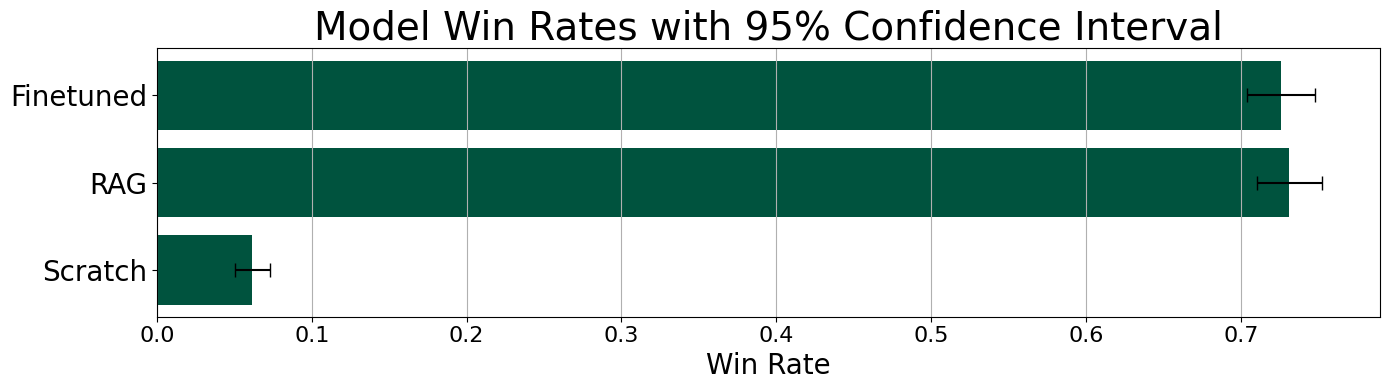

In [ ]:
# Adjusting the plot with a transparent background and white fill within the plot area
plt.figure(figsize=(14, 4), facecolor='none')  # Making the plot wider with a transparent figure background
ax = plt.gca()
ax.set_facecolor('white')  # Setting the inside of the plot to be white

y_pos_wide_transparent = np.arange(len(models_real))
bars = plt.barh(y_pos_wide_transparent, win_rates_real_values, color='#00533E', xerr=[win_rates_real_values - np.array(lower_bounds_real), np.array(upper_bounds_real) - win_rates_real_values], capsize=5)
plt.yticks(y_pos_wide_transparent, models_real, fontsize=20)  # Increasing font size for model names
plt.xlabel('Win Rate', fontsize=20)  # Increasing font size for the x-axis label
plt.title('Model Win Rates with 95% Confidence Interval', fontsize=28)  # Increasing the title font size
plt.xticks(fontsize=16)  # Increasing font size for x-axis ticks
plt.grid(axis='x')

plt.tight_layout()  # Adjust layout to not cut off labels

plt.savefig('./adjusted_bar_graph.png')#, transparent=True)  # Save with transparent background
plt.show()
